## __Intro to Data Science:__
### Testing Intuition w/ Visualization

# How data science workflows are supposed to go:

### 1) Get data.

### 2) Look at numbers.

### 3) Do Math!

### 4) Visualize results.

# How they actually go:

### 1) Figure out how you're going to get data.

### 2) Spend a lot of time cleaning data.

### 3) Look at what are supposed to be numbers.

### 4) Spend more time cleaning and getting data that you found out you need.

### 5) Visualize.

### 6) Clean + Splice _creatively._

### 7) DO MATH!

### 8) Rinse and repeat steps 3-7 until deadline,

_For everyone's sake, we're not really going to get into steps 1 and 2._

## So the first (and usually hardest) step is to pick a problem. Make it one you're interested in - but don't tie yourself down to it. 

### A good problem changes as you dig deeper into it. 


I'm a (recovering) NBA addict, so I'm picking something basketball related.

### What is playoff Lebron?

## Step 1: Get the data.

### Forget what I said earlier - this is the hardest part.

## Thankfully, smart people are working on problems like this, so for the purposes of this talk, it's going to be solved by nba_py: https://github.com/seemethere/nba_py

In [4]:
import nba_helper_functions
from nba_py import  team, game
import pandas as pd
import numpy as  np
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nbashots as nba # this will throw a warning if using matplotlib 1.5
import requests as r
%matplotlib inline

In [5]:
cavs_id =  1610612739

# Step 2: Splice and clean the data:

Writing helper functions counts as cleaning.

In [6]:
def lebron_data(season, season_type):
    """Gets info on all cavs games, and returns dataframe with only Lebron's statistics"""
    val = team.TeamGameLogs(cavs_id, season=season, season_type = season_type)
    game_ids = val.info()['Game_ID'].tolist()
    data = pd.DataFrame()
    for id in game_ids:
        all_players = game.PlayerTracking(id).info()[['GAME_ID', 'PLAYER_ID', 'MIN', 'SPD', 'TCHS', 'PASS', 'AST', 'CFGM', 'CFGA', 'UFGM', 'UFGA']]
        lebron = all_players.loc[all_players['PLAYER_ID'] == 2544]
        #this gets some player tracking stats; average speed, touches, passes, assists, and some shot info.
        data = data.append(lebron)
    return data

In [7]:
df_playoffs =  pd.DataFrame()
playoff_seasons = ['2014-15', '2015-16', '2016-17']
for season in  playoff_seasons:
    df = lebron_data(season, 'Playoffs')
    df_playoffs =  df_playoffs.append(df)

In [8]:
df_regular_season = lebron_data('2016-17', 'Regular Season')

In [9]:
df_playoffs.head()

GAME_ID  PLAYER_ID    MIN   SPD  TCHS  PASS  AST  CFGM  CFGA  UFGM  \
13  0041400406       2544  46:42  3.85   127    75    9     9    18     4   
0   0041400405       2544  44:46  4.02   119    73   11     9    24     6   
13  0041400404       2544  40:55  3.84   118    80    8     5    13     2   
13  0041400403       2544  45:60  3.68   111    56    8     9    24     5   
0   0041400402       2544  50:20  3.89   131    73   11     4    22     7   

    UFGA  
13    15  
0     10  
13     9  
13    10  
0     13

Now that we've gotten a good chunk, it's time to clean!

In [11]:
#Filtering out rest games
df_regular_season = df_regular_season[df_regular_season['SPD'] != 0]

In [16]:
def hh_mm_ss2seconds(hh_mm_ss):
    import functools
    return functools.reduce(lambda min, sec: (min*60 + sec)/60.0, map(int, hh_mm_ss.split(':')))

In [17]:
df_playoffs['MIN'] = df_playoffs['MIN'].map(lambda x: hh_mm_ss2seconds(x))
df_regular_season['MIN'] = df_regular_season['MIN'].map(lambda x: hh_mm_ss2seconds(x))

### Step 3: Numbers!

In [18]:
df_playoffs.describe()

PLAYER_ID        MIN        SPD        TCHS       PASS        AST  \
count       59.0  59.000000  59.000000   59.000000  59.000000  59.000000   
mean      2544.0  40.860169   3.771695   95.457627  60.813559   7.966102   
std          0.0   4.832949   0.113033   16.686069  11.075718   2.652040   
min       2544.0  28.133333   3.570000   57.000000  37.000000   3.000000   
25%       2544.0  38.966667   3.700000   86.000000  53.000000   6.000000   
50%       2544.0  41.250000   3.770000   94.000000  60.000000   8.000000   
75%       2544.0  44.750000   3.840000  104.500000  67.000000   9.000000   
max       2544.0  50.333333   4.130000  140.000000  86.000000  14.000000   

            CFGM       CFGA       UFGM       UFGA  
count  59.000000  59.000000  59.000000  59.000000  
mean    6.779661  13.152542   4.457627   9.644068  
std     2.297433   4.509811   1.976779   3.325776  
min     2.000000   5.000000   1.000000   4.000000  
25%     5.000000  10.000000   3.000000   8.000000  
50%     7.000000  13.000000   4.000000   9.000000  
75%     8.000000  16.000000   6.000000  11.500000  
max    12.000000  26.000000   9.000000  21.000000

In [19]:
df_regular_season.describe()

PLAYER_ID        MIN        SPD        TCHS        PASS        AST  \
count       74.0  74.000000  74.000000   74.000000   74.000000  74.000000   
mean      2544.0  37.764640   3.755135   88.743243   59.472973   8.729730   
std          0.0   4.592402   0.140540   14.464942   11.922378   3.401439   
min       2544.0  27.266667   3.330000   50.000000   30.000000   2.000000   
25%       2544.0  35.408333   3.660000   80.250000   54.000000   6.000000   
50%       2544.0  38.083333   3.750000   89.000000   58.000000   8.000000   
75%       2544.0  40.000000   3.850000   97.000000   65.750000  11.000000   
max       2544.0  51.650000   4.080000  136.000000  101.000000  17.000000   

            CFGM       CFGA       UFGM       UFGA  
count  74.000000  74.000000  74.000000  74.000000  
mean    5.810811   9.635135   4.135135   8.527027  
std     2.181339   3.287895   2.029403   2.800308  
min     1.000000   3.000000   0.000000   3.000000  
25%     4.000000   7.000000   3.000000   7.000000  
50%     6.000000   9.500000   4.000000   8.000000  
75%     8.000000  11.000000   5.000000  10.750000  
max    10.000000  18.000000   9.000000  17.000000

### Step 4: Some more splicing:

In [20]:
df_playoffs.describe() - df_regular_season.describe() 

PLAYER_ID        MIN        SPD       TCHS       PASS        AST  \
count      -15.0 -15.000000 -15.000000 -15.000000 -15.000000 -15.000000   
mean         0.0   3.095530   0.016560   6.714384   1.340586  -0.763628   
std          0.0   0.240547  -0.027507   2.221127  -0.846660  -0.749400   
min          0.0   0.866667   0.240000   7.000000   7.000000   1.000000   
25%          0.0   3.558333   0.040000   5.750000  -1.000000   0.000000   
50%          0.0   3.166667   0.020000   5.000000   2.000000   0.000000   
75%          0.0   4.750000  -0.010000   7.500000   1.250000  -2.000000   
max          0.0  -1.316667   0.050000   4.000000 -15.000000  -3.000000   

            CFGM       CFGA       UFGM       UFGA  
count -15.000000 -15.000000 -15.000000 -15.000000  
mean    0.968850   3.517407   0.322492   1.117041  
std     0.116095   1.221916  -0.052623   0.525468  
min     1.000000   2.000000   1.000000   1.000000  
25%     1.000000   3.000000   0.000000   1.000000  
50%     1.000000   3.500000   0.000000   1.000000  
75%     0.000000   5.000000   1.000000   0.750000  
max     2.000000   8.000000   0.000000   4.000000

### (We're skipping step 5 for now- it's not fun.)

### Step 6: Time to clean+visualize (again):

In [21]:
court_shapes =  nba_helper_functions.court_shapes()

In [23]:
playoff_df = pd.DataFrame()

for season in playoff_seasons:
    df = nba_helper_functions.get_shot_info(season= season)
    playoff_df =  playoff_df.append(df)

In [25]:
missed_shot_trace = go.Scatter(
    x = playoff_df[playoff_df['EVENT_TYPE'] == 'Missed Shot']['LOC_X'],
    y = playoff_df[playoff_df['EVENT_TYPE'] == 'Missed Shot']['LOC_Y'],
    mode = 'markers',
    name = 'Missed Shot',
    marker = dict(
        size = 5,
        color = 'rgba(255, 255, 0, .8)',
        line = dict(
            width = 1,
            color = 'rgb(0, 0, 0, 1)'
        )
    )
)
made_shot_trace = go.Scatter(
    x = playoff_df[playoff_df['EVENT_TYPE'] == 'Made Shot']['LOC_X'],
    y = playoff_df[playoff_df['EVENT_TYPE'] == 'Made Shot']['LOC_Y'],
    mode = 'markers',
    name = 'Made Shot',
    marker = dict(
        size = 5,
        color = 'rgba(0, 200, 100, .8)',
        line = dict(
            width = 1,
            color = 'rgb(0, 0, 0, 1)'
        )
    )
)


layout = go.Layout(
    title='Shots by Lebron Last 3 Playoff Series',
    showlegend=True,
    xaxis=dict(
        showgrid=False,
        range=[-300, 300]
    ),
    yaxis=dict(
        showgrid=False,
        range=[-100, 500]
    ),
    height=600,
    width=650,
    shapes=court_shapes
)

data = [missed_shot_trace, made_shot_trace]
 
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,  filename='Lebron Playoffs Shot Chart')

In [26]:
regular_season = nba_helper_functions.get_shot_info(season_type = 'Regular Season')

In [28]:
missed_shot_trace = go.Scatter(
    x = regular_season[regular_season['EVENT_TYPE'] == 'Missed Shot']['LOC_X'],
    y = regular_season[regular_season['EVENT_TYPE'] == 'Missed Shot']['LOC_Y'],
    mode = 'markers',
    name = 'Missed Shot',
    marker = dict(
        size = 5,
        color = 'rgba(255, 255, 0, .8)',
        line = dict(
            width = 1,
            color = 'rgb(0, 0, 0, 1)'
        )
    )
)
made_shot_trace = go.Scatter(
    x = regular_season[regular_season['EVENT_TYPE'] == 'Made Shot']['LOC_X'],
    y = regular_season[regular_season['EVENT_TYPE'] == 'Made Shot']['LOC_Y'],
    mode = 'markers',
    name = 'Made Shot',
    marker = dict(
        size = 5,
        color = 'rgba(0, 200, 100, .8)',
        line = dict(
            width = 1,
            color = 'rgb(0, 0, 0, 1)'
        )
    )
)


layout = go.Layout(
    title='Shots by Lebron 2016-2017 Regular Season',
    showlegend=True,
    xaxis=dict(
        showgrid=False,
        range=[-300, 300]
    ),
    yaxis=dict(
        showgrid=False,
        range=[-100, 500]
    ),
    height=600,
    width=650,
    shapes=court_shapes
)

data = [missed_shot_trace, made_shot_trace]
 
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,  filename='Lebron Regular Season Shot Chart')

### Clearly, that showed everything that we were looking for.... so time for some _math._

#### 2-Dimensional binned statistics (a fancy way of saying 2D histogram) are useful for situations like this. 

In [29]:
from scipy import stats

In [30]:
mean, xedges, yedges, binnumber = stats.binned_statistic_2d(x=playoff_df.LOC_X, y=playoff_df.LOC_Y, values=playoff_df.SHOT_MADE_FLAG, statistic='mean', bins=35)

In [31]:
data = [
    go.Heatmap(
        z=mean.T,
        x=xedges,
        y=yedges,
        colorscale='YIOrRd',
        opacity = .5,
        reversescale = True
    )
]

layout = go.Layout(
    title='Playoff Lebron Binned Heatmap Last 3 Years',
    shapes=court_shapes
)

fig = go.Figure(data=data, layout=layout)
    
py.iplot(fig, filename='Playoff Lebron Binned Heatmap Last 3 Years')


In [32]:
mean_reg, xedges_reg, yedges_reg, binnumber = stats.binned_statistic_2d(x=regular_season.LOC_X, y=regular_season.LOC_Y, values=regular_season.SHOT_MADE_FLAG, statistic='mean', bins=35)

data = [
    go.Heatmap(
        z=mean_reg.T,
        x=xedges_reg,
        y=yedges_reg,
        colorscale='YIOrRd',
        opacity = .5,
        reversescale = True
    )
]

layout = go.Layout(
    title='Lebron Binned Heatmap 2016-17',
    
    shapes=court_shapes
)

fig = go.Figure(data=data, layout=layout)
    
py.iplot(fig, filename='Lebron Binned Heatmap 2016-17')


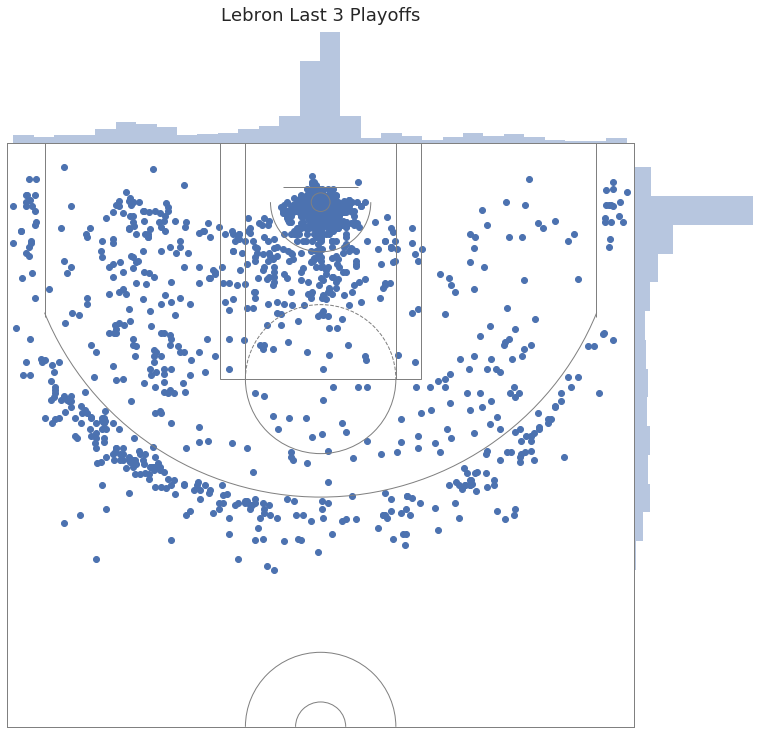

In [45]:
from matplotlib.offsetbox import OffsetImage

grid = nba.shot_chart_jointplot(playoff_df.LOC_X, playoff_df.LOC_Y,
                                title="Lebron Last 3 Playoffs")

plt.show()

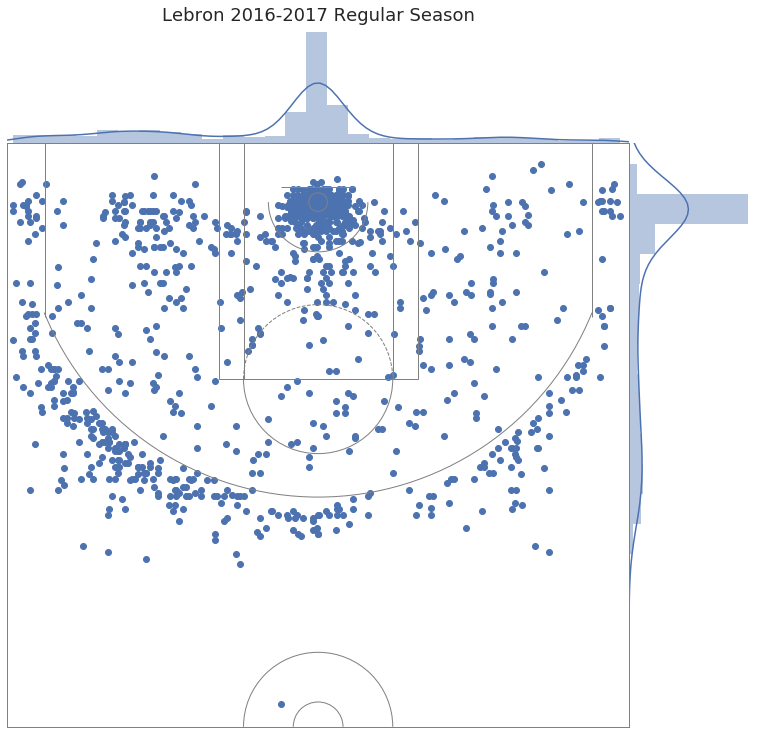

In [46]:
grid = nba.shot_chart_jointgrid(regular_season.LOC_X, regular_season.LOC_Y,
                                title="Lebron 2016-2017 Regular Season")

plt.show()

## Time for some math!

### Everyone knows that  _guassian kernal density estimation_ work well for low dimensional vectors, right?

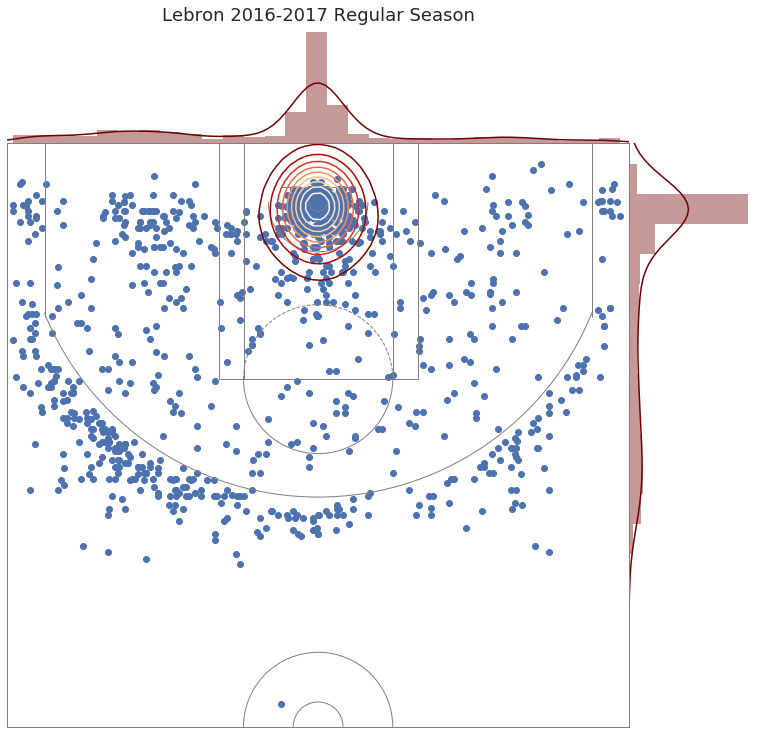

In [52]:
cmap=plt.cm.gist_heat_r
grid = nba.shot_chart_jointgrid(regular_season.LOC_X, regular_season.LOC_Y,
                                title="Lebron 2016-2017 Regular Season",marginals_color=cmap(.7),
                                joint_type="scatter",joint_kde_shade=True)

grid.plot_joint(sns.kdeplot, cmap=plt.cm.OrRd_r)
plt.show()

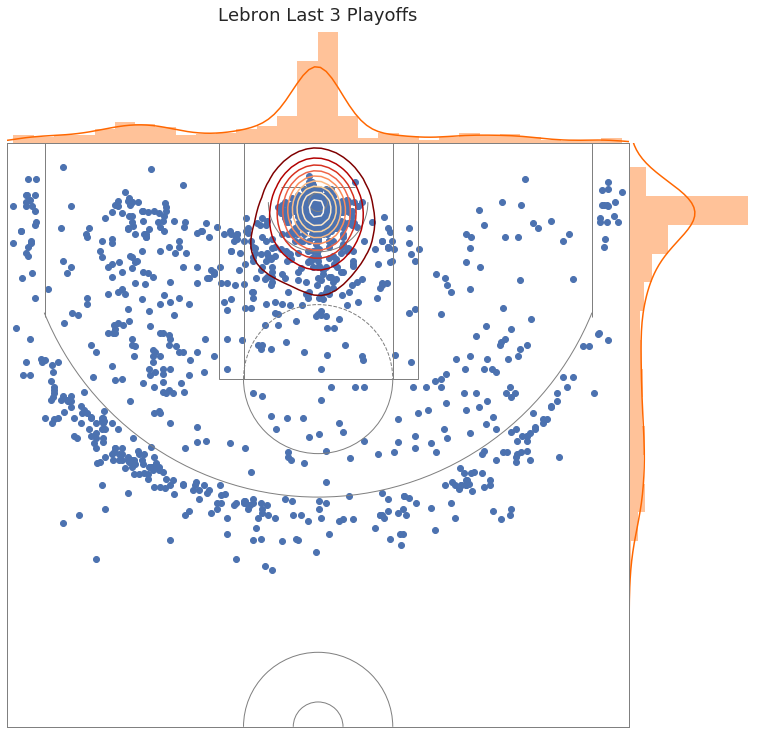

In [54]:

cmap=plt.cm.gist_heat_r
grid = nba.shot_chart_jointgrid(playoff_df.LOC_X, playoff_df.LOC_Y,
                                title="Lebron Last 3 Playoffs",
                                joint_type="scatter", marginals_color=cmap(.3), joint_kde_shade=True)


grid.plot_joint(sns.kdeplot, cmap=plt.cm.OrRd_r)
plt.show()

## So we're seeing a lot here, but we're still not seeing a pronounced difference  (based on my hunch that there is one). 

#### One might argue that this is classic overfitting, but that one isn't the one talking through this.

In [55]:
reg_season_fourth =  regular_season[regular_season['PERIOD'] == 4]

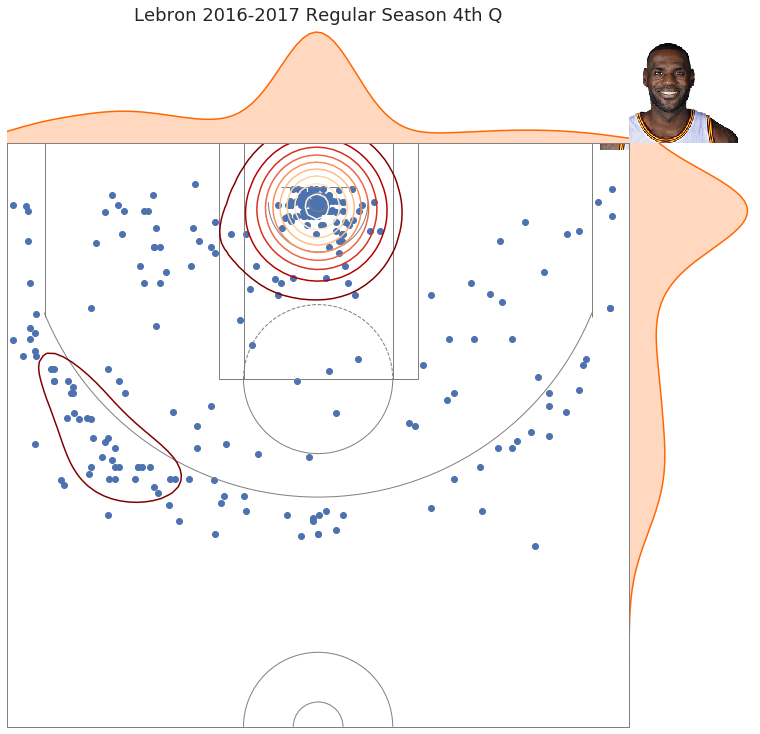

In [56]:
img = nba.get_player_img(2544)

cmap=plt.cm.gist_heat_r
grid = nba.shot_chart_jointgrid(reg_season_fourth.LOC_X, reg_season_fourth.LOC_Y,
                                title="Lebron 2016-2017 Regular Season 4th Q",
                                joint_type="scatter", marginals_color=cmap(.3),
                                marginals_type="kde")

grid.plot_joint(sns.kdeplot, cmap=plt.cm.OrRd_r)
offset_img = OffsetImage(img, zoom=0.6)
offset_img.set_offset((600, 584))
grid.ax_joint.add_artist(offset_img)
plt.show()

In [57]:
playoff_df_fourth =  playoff_df[playoff_df['PERIOD'] == 4]

In [58]:
from scipy.misc import imread
im = imread("Lebron-James-Stare_one.jpg")

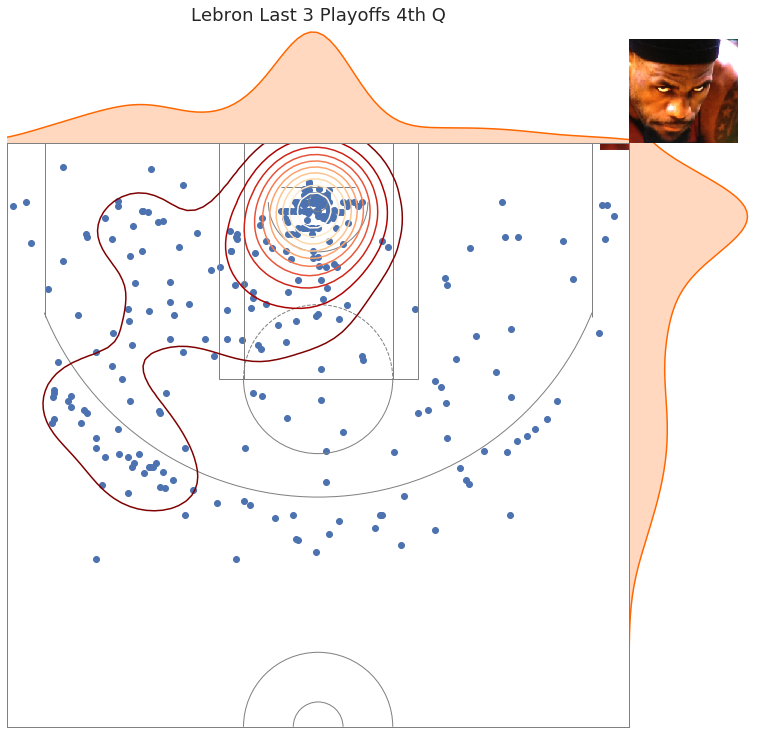

In [59]:
plt.rcParams['figure.figsize'] = (20, 18)

cmap=plt.cm.gist_heat_r
grid = nba.shot_chart_jointgrid(playoff_df_fourth.LOC_X, playoff_df_fourth.LOC_Y,
                                title="Lebron Last 3 Playoffs 4th Q",
                                joint_type="scatter", marginals_color=cmap(.3),
                                marginals_type="kde")

grid.plot_joint(sns.kdeplot, cmap=plt.cm.OrRd_r)
offset_img = OffsetImage(im, zoom=0.6)
offset_img.set_offset((600, 584))
grid.ax_joint.add_artist(offset_img)
plt.show()